<a href="https://www.kaggle.com/code/masudrahman19/gold-price-prediction-using-15-year-market-data?scriptVersionId=102411548" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<img src= "https://images.unsplash.com/photo-1598561222812-63429c3eee2f?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=880&q=80" alt ="Gold" style='width: 600px;'>

# Predicting Gold Price using Machine Learning
In this notebook, we use machine learning models to predict gold price in the future based on 5 ETF/ portfolio performances in the stock market over a period of 15 years. We use publicly available adjusted closing price data pulled from stock market.

**Data Summary:**

This dataset will contain 6 variables as follows:

**1. Date:** date for which market data is collected. *Date will become our index in the dataframe*.

**2. ^GSPC:** Standard & Poor's price index of 500 U.S. companies.

**3. GLD:** SPDR Gold Shares ETF.

**4. USO:** The United States Oil Fund, ETF.

**5. SLV:** Silver ETF. Purely reflects the price movements of silver.

**6. EURUSD=X:** euro against U.S. dollar exchange rate.

# 🎬 Initialization

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import missingno

In [2]:
sns.set_context("notebook")
sns.set_style("whitegrid")

In [3]:
# Store the dates for today and 15 years ago from today in 2 variabes for parsing in the next code block
end_date = '2022-07-31'
start_date = '2007-07-31'

In [4]:
#Data ingestion
df = pdr.get_data_yahoo(["^GSPC","GLD","USO","SLV","EURUSD=X"],start=start_date, end = end_date)['Adj Close']

In [5]:
df

Symbols,^GSPC,GLD,USO,SLV,EURUSD=X
Date,,,,,
2007-07-30,NaN,NaN,NaN,NaN,1.367204
2007-07-31,1455.270020,65.790001,468.239990,12.802000,1.367708
2007-08-01,1465.810059,65.930000,462.079987,12.890000,1.370708
2007-08-02,1472.199951,65.889999,461.600006,12.899000,1.378702
2007-08-03,1433.060059,66.690002,451.519989,13.027000,NaN
...,...,...,...,...,...
2022-07-26,3921.050049,160.039993,75.160004,17.160000,1.012956
2022-07-27,4023.610107,161.669998,77.870003,17.600000,1.020929
2022-07-28,4072.429932,163.639999,77.129997,18.430000,1.019233


# 💇 Pre-processing

We will now inspect various aspects of the dataset for missing, incorrect data types etc.

<AxesSubplot:>

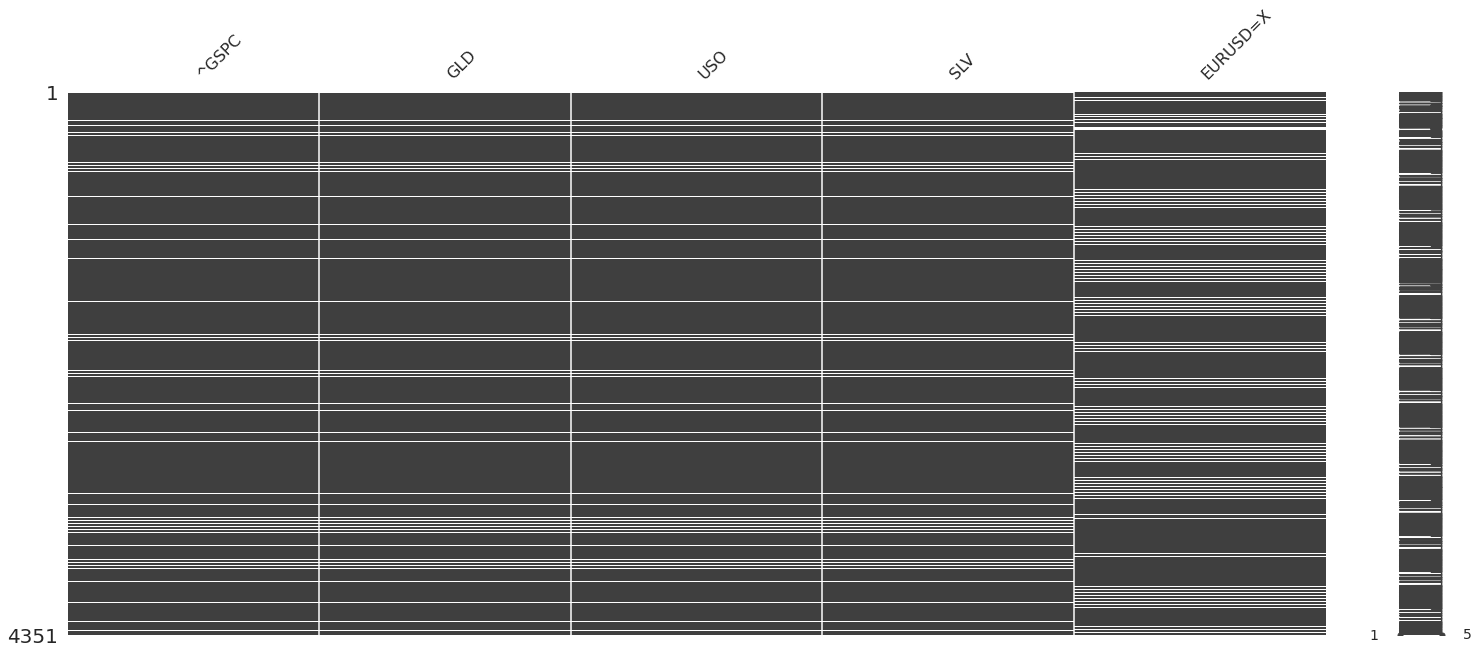

In [6]:
missingno.matrix(df) #visually inspect for missing values

In [7]:
df = df.dropna()

In [8]:
df.head() #check the first 5 observations

Symbols,^GSPC,GLD,USO,SLV,EURUSD=X
Date,,,,,
2007-07-31,1455.270020,65.790001,468.239990,12.802,1.367708
2007-08-01,1465.810059,65.930000,462.079987,12.890,1.370708
2007-08-02,1472.199951,65.889999,461.600006,12.899,1.378702
2007-08-06,1467.670044,66.519997,433.600006,12.883,1.374098
2007-08-07,1476.709961,66.480003,434.880005,13.034,1.380300


In [9]:
df.shape # Check dataset shape

(3314, 5)

In [10]:
df.describe() # Summary statistics

Symbols,^GSPC,GLD,USO,SLV,EURUSD=X
count,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000
mean,2160.030811,129.650640,210.209375,19.520008,1.247344
std,994.237065,28.005578,163.977028,6.404367,0.132310
min,676.530029,64.680000,17.040001,8.850000,1.002567
25%,1337.882507,113.652502,86.720001,15.220000,1.129012
50%,1998.640015,123.970001,161.080002,17.080000,1.227453
75%,2762.004883,155.360001,293.519989,22.517500,1.352745
max,4796.560059,193.889999,939.840027,47.259998,1.598798


In [11]:
df.isnull().sum() # Check for missing data

Symbols
^GSPC       0
GLD         0
USO         0
SLV         0
EURUSD=X    0
dtype: int64

In [12]:
df.info() # Check data types

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3314 entries, 2007-07-31 to 2022-07-28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ^GSPC     3314 non-null   float64
 1   GLD       3314 non-null   float64
 2   USO       3314 non-null   float64
 3   SLV       3314 non-null   float64
 4   EURUSD=X  3314 non-null   float64
dtypes: float64(5)
memory usage: 155.3 KB


# 📈 Exploratory Data Analysis

In [13]:
correlation = df.corr()

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

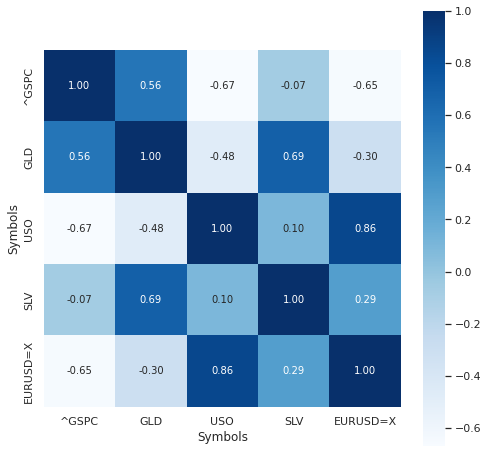

In [14]:
# Correlation heatmap
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f',annot=True, annot_kws={'size':10}, cmap='Blues')

In [15]:
# Correlation of GLD with other stock prices
correlation['GLD']

Symbols
^GSPC       0.555863
GLD         1.000000
USO        -0.478544
SLV         0.689961
EURUSD=X   -0.301157
Name: GLD, dtype: float64

From the output above, we can see that GLD and SLV are positively correlated (0.68), and also GLD and ^GSPC (0.56). We also see some negative correlation with EUR/USD & USO.

<AxesSubplot:xlabel='GLD', ylabel='Count'>

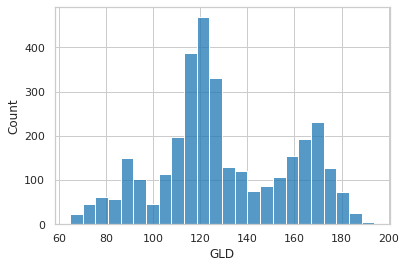

In [16]:
# Check distribution of gold prices over time
sns.histplot(df['GLD'])

# 💡 Machine Learning for Training Model

Now we will start the process of shaping our data for machine learning application.

In [17]:
X = df.drop(['GLD'],axis=1) # Setting up the training data, removing the target variable and the date variable
Y = df['GLD'] # Setting up our target variable as a separate pandas series on its own

In [18]:
X.head() # Visually inspect dataframe X

Symbols,^GSPC,USO,SLV,EURUSD=X
Date,,,,
2007-07-31,1455.270020,468.239990,12.802,1.367708
2007-08-01,1465.810059,462.079987,12.890,1.370708
2007-08-02,1472.199951,461.600006,12.899,1.378702
2007-08-06,1467.670044,433.600006,12.883,1.374098
2007-08-07,1476.709961,434.880005,13.034,1.380300


In [19]:
Y.head() # Visually inspect series Y

Date
2007-07-31    65.790001
2007-08-01    65.930000
2007-08-02    65.889999
2007-08-06    66.519997
2007-08-07    66.480003
Name: GLD, dtype: float64

For setting up the machine learning model, we will now split the data into Train and Test segments.

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [21]:
regressor = RandomForestRegressor(n_estimators=100)

In [22]:
regressor.fit(X_train,Y_train) # training the model

RandomForestRegressor()

In [23]:
test_data_prediction = regressor.predict(X_test) # prediction on Test Data

In [24]:
test_data_prediction

array([115.70059982, 110.99469872,  85.14220047, 124.68720154,
       161.96749924, 123.99319939, 111.50410049, 115.83590065,
       161.27120056, 170.48319611, 122.07169952,  87.66509842,
       129.71569893, 147.90989761, 118.04390205, 127.71169899,
        92.24880074, 141.91020096, 121.50360207, 115.99750053,
        85.35969978, 127.27380051, 116.24549889, 165.14039948,
        98.30400177, 122.61009872,  92.80969978,  87.7739006 ,
       155.19500137, 120.61979836,  86.11449852, 139.29490143,
        96.13890053, 179.54820053, 112.66249969,  85.79379807,
        73.23600037, 119.16590157, 122.30259964, 121.08209961,
       120.87800003, 115.31720093, 168.88459671, 131.03430267,
       161.59430222, 127.44589928, 114.47039902,  88.23900032,
       117.69079826, 122.18179962,  95.97999886, 117.78860062,
       121.74980003, 123.80520012,  73.03350075, 112.91770157,
       140.2950032 , 168.78070114, 115.79680069,  78.90199974,
       116.12069885, 116.05010094, 115.34779922, 126.36

# 💯 Evaluate Model

In [25]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9928981014432061


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


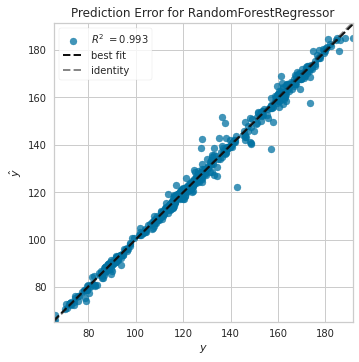

In [26]:
# Visualize R-squared error
from yellowbrick.regressor import prediction_error
visualizer = prediction_error(regressor, X_train, Y_train, X_test, Y_test)

We can see that we have a very low R-squared error value, which hints towards a well-performing model. Let us now test how our actual value and predicted value differs over time.

In [27]:
Y_test = list(Y_test)

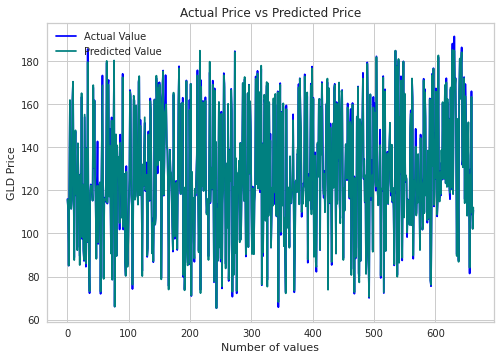

In [28]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='teal', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


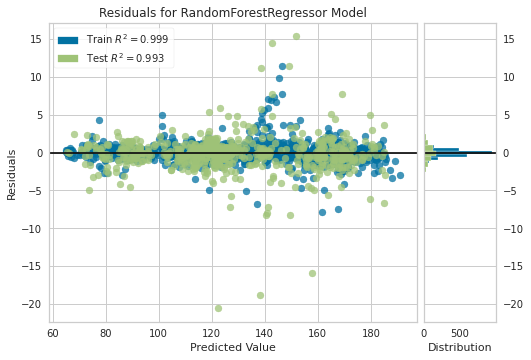

In [29]:
# Plotting residuals
from yellowbrick.regressor import residuals_plot
visualizer = residuals_plot(regressor, X_train, Y_train, X_test, Y_test)